
# Import Libraries

In [38]:
import pandas as pd
import pyodbc 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pickle

# Load Model from Pickle File

In [39]:

with open('gbc_candidate_model.pkl', 'rb') as file:
    gbc_candidate_model = pickle.load(file)

# Import data to Model

In [40]:

server = 'hvs-ssis5,1433'
database = 'common' # enter database name
cnxn=pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';Trusted_Connection=Yes')


In [42]:
for_pred = pd.read_sql("""SELECT API_ID,AGE,CENSUS_ST,CHRISTFAM,CNS_MEDINC,CNSUS_PCTA,CNSUS_PCTB,CNSUS_PCTH,CNSUS_PCTI,CNSUS_PCTM,CNSUS_PCTO,
CNSUS_PCTP,CNSUS_PCTW,COUNTY_TYPE,CREDRATE,DON_ANML,DON_ARTCUL,DON_CHARIT,DON_CHILD,DON_ENVIR,DON_ENVWLD,DON_HEALTH,DON_INTAID,DON_OTHER,DON_POLCONS,
DON_POLIT,DON_POLLIB,DON_RELIG,DON_VET,EDUCATION,ETHNIC_INFER,FUND_POLIT,GENERATION,HOMEMKTVAL,HOMEOWNRNT,LANGUAGE,NETWORTH,PARTY_CODE,PARTY_MIX,
PRESENCHLD,PRFL_2NDAMEND,PRFL_ACTIVE_MIL,PRFL_AMZN_PRIME,PRFL_ANML_RIGHTS,PRFL_BIDEN_SUPPORT,PRFL_BLM_SUPPORT,PRFL_BORDER_SECURITY,PRFL_CHOICELIFE,PRFL_CLINTON_SUPPORT,
PRFL_CONSERVATIVE_NEWS,PRFL_EDUCATION,PRFL_ENVIRONMENT,PRFL_EVANGELICAL,PRFL_FENCE_SITTER,PRFL_GUN_CONTROL,PRFL_HEALTHCARE,PRFL_HEALTHCARE_REFORM,
PRFL_IMMIGRATION_REFORM,PRFL_INFLUENCER,PRFL_INSURANCE,PRFL_LABOR,PRFL_LGBT_SUPPORT,PRFL_LIBERAL_NEWS,PRFL_MARIJUANA_REFORM,PRFL_MARRIAGE_EQUALITY,
PRFL_METOO_SUPPORT,PRFL_MIL_SUPPORT,PRFL_MINWAGE,PRFL_OBAMA,PRFL_PERSUADABLE_VOTER,PRFL_POLITICAL_IDEOLOGY,PRFL_SANDERS_SUPPORT,PRFL_TAXES,PRFL_TEACHERS_UNION,
PRFL_TEAPARTY,PRFL_TRUMP_SUPPORT,PRFL_VETERAN,RELIGION,SEX,TOD_PRES_D_2016,TOD_PRES_D_2016_PREC,TOD_PRES_D_2020_PREC,TOD_PRES_DIFF_2016,TOD_PRES_DIFF_2016_PREC,
TOD_PRES_DIFF_2020_PREC,TOD_PRES_O_2016,TOD_PRES_O_2016_PREC,TOD_PRES_O_2020_PREC,TOD_PRES_R_2016,TOD_PRES_R_2016_PREC,TOD_PRES_R_2020_PREC,VOTER_CNT,
VTR_GEN00,VTR_GEN01,VTR_GEN02,VTR_GEN03,VTR_GEN04,VTR_GEN05,VTR_GEN06,VTR_GEN07,VTR_GEN08,VTR_GEN09,VTR_GEN10,VTR_GEN11,VTR_GEN12,VTR_GEN13,VTR_GEN14,
VTR_GEN15,VTR_GEN16,VTR_GEN17,VTR_GEN18,VTR_GEN19,VTR_GEN20,VTR_GEN21,VTR_GEN22,VTR_OTH00,VTR_OTH01,VTR_OTH02,VTR_OTH03,VTR_OTH04,VTR_OTH05,VTR_OTH06,VTR_OTH07,
VTR_OTH08,VTR_OTH09,VTR_OTH10,VTR_OTH11,VTR_OTH12,VTR_OTH13,VTR_OTH14,VTR_OTH15,VTR_OTH16,VTR_OTH17,VTR_OTH18,VTR_OTH19,VTR_OTH20,VTR_OTH21,VTR_OTH22,VTR_PPP00,
VTR_PPP04,VTR_PPP08,VTR_PPP12,VTR_PPP16,VTR_PPP20,VTR_PRI00,VTR_PRI01,VTR_PRI02,VTR_PRI03,VTR_PRI04,VTR_PRI05,VTR_PRI06,VTR_PRI07,VTR_PRI08,VTR_PRI09,VTR_PRI10,
VTR_PRI11,VTR_PRI12,VTR_PRI13,VTR_PRI14,VTR_PRI15,VTR_PRI16,VTR_PRI17,VTR_PRI18,VTR_PRI19,VTR_PRI20,VTR_PRI21,VTR_PRI22,XX_VOTERS AS STATE
from de_voters..de_voters with (nolock)""", cnxn) 

C:\Users\amanda.kaplan\AppData\Local\Temp\ipykernel_24872\4047769818.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  for_pred = pd.read_sql("""SELECT API_ID,AGE,CENSUS_ST,CHRISTFAM,


In [43]:
cnxn.close()

In [85]:
for_pred =pd.read_csv('C:/Users/amanda.kaplan/OneDrive - Aristotle/Desktop/Kennedy model/Data for Modeling Project/data_500k.csv')

C:\Users\amanda.kaplan\AppData\Local\Temp\ipykernel_24872\67682926.py:1: DtypeWarning: Columns (22,56,58,86,93,117,144,146,148,150,159,164,169,171,178,192,193,205,214,215,241,293,297) have mixed types. Specify dtype option on import or set low_memory=False.
  for_pred =pd.read_csv('C:/Users/amanda.kaplan/OneDrive - Aristotle/Desktop/Kennedy model/Data for Modeling Project/data_500k.csv')


In [64]:
print(len(for_pred)) 

500000


In [89]:
print(for_pred['FUND_POLIT'])

0          
1          
2          
3         1
4         1
         ..
499995     
499996     
499997     
499998     
499999     
Name: FUND_POLIT, Length: 500000, dtype: object


# Pre-Processing

In [65]:
#replace blanks/spaces with NaN
for_pred.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [66]:

replacements = {
    #'CENSUS_TRK':0,
    'AGE': for_pred['AGE'].median(),
    'CNS_MEDINC': for_pred['CNS_MEDINC'].mode()[0],
    'CNSUS_PCTA': for_pred['CNSUS_PCTA'].median(),
    'CNSUS_PCTB':for_pred['CNSUS_PCTB'].median(),
    'CNSUS_PCTH':for_pred['CNSUS_PCTH'].median(),
    'CNSUS_PCTI':for_pred['CNSUS_PCTI'].median(),
    'CNSUS_PCTM':for_pred['CNSUS_PCTM'].median(),
    'CNSUS_PCTO':for_pred['CNSUS_PCTO'].median(),
    'CNSUS_PCTP':for_pred['CNSUS_PCTP'].median(), 
    'CNSUS_PCTW':for_pred['CNSUS_PCTW'].median(), 
    #'CONG_DIST': '000',
    'COUNTY_TYPE': 'UNK',
    #'COUNTY_ST': '000',
    'CREDRATE':'UNK',
    'DON_POLIT': 'N',
    'DON_POLCONS':'N',
    'DON_POLLIB':'N',
    'FUND_POLIT':'N',
    'DON_CHARIT':'N',
    'DON_RELIG':'N',
    'DON_HEALTH':'N',
    'DON_ANML':'N',
    'DON_ARTCUL':'N',
    'DON_CHILD':'N',
    'DON_ENVIR':'N',
    'DON_ENVWLD':'N',
    'DON_INTAID':'N',
    'DON_OTHER':'N',
    'DON_VET':'N',
    'PRFL_ENVIRONMENT':'N',
    'EDUCATION': for_pred['EDUCATION'].mode()[0],
    #'ETHNICCODE':'UNK',
    'ETHNIC_INFER': for_pred['ETHNIC_INFER'].mode()[0],
    'HOMEMKTVAL': for_pred['HOMEMKTVAL'].mode()[0],
    'HOMEOWNRNT':for_pred['HOMEOWNRNT'].mode()[0],
    #'INCOMESTHH':for_pred['INCOMESTHH'].mode()[0],
    #'LIFESTAGE_CLUSTER':'UNK',
    'LANGUAGE':'UNK',
    'NETWORTH':for_pred['NETWORTH'].mode()[0],
    'PRESENCHLD':'N',
    'PRFL_VETERAN':'N',
    'PRFL_2NDAMEND':'N',
    'PRFL_BIDEN_SUPPORT':'N',
    'PRFL_BORDER_SECURITY':'N',
    'PRFL_EVANGELICAL':'N',
    'PRFL_IMMIGRATION_REFORM':'N',
    'PRFL_POLITICAL_IDEOLOGY':'UNK',
    'PRFL_TRUMP_SUPPORT':'N',
    'PRFL_FENCE_SITTER':'N',
    'PRFL_PERSUADABLE_VOTER':'N',
    'PRFL_MARRIAGE_EQUALITY':0,
    'PRFL_METOO_SUPPORT':'N',
    'PRFL_MIL_SUPPORT':'N',
    'PRFL_LGBT_SUPPORT':'0',
    'PRFL_MINWAGE':0,
    'PRFL_CHOICELIFE':0,
    'PRFL_LIBERAL_NEWS':'N',
    'PRFL_CONSERVATIVE_NEWS':'N',
    'RELIGION':for_pred['RELIGION'].mode()[0],
    'SEX':'UNK',
    #'ST_LO_HOUS':'000',
    #'ST_UP_HOUS':'00',
    'TOD_PRES_D_2016': for_pred['TOD_PRES_D_2016'].median(),
    'TOD_PRES_D_2016_PREC': for_pred['TOD_PRES_D_2016_PREC'].median(),
    'TOD_PRES_D_2020_PREC' : for_pred['TOD_PRES_D_2020_PREC'].median(),
    'TOD_PRES_O_2016' : for_pred['TOD_PRES_O_2016'].median(),
    'TOD_PRES_O_2016_PREC': for_pred['TOD_PRES_O_2016_PREC'].median(),
    'TOD_PRES_O_2020_PREC': for_pred['TOD_PRES_O_2020_PREC'].median(),
    'TOD_PRES_R_2016' : for_pred['TOD_PRES_R_2016'].median(),
    'TOD_PRES_R_2016_PREC': for_pred['TOD_PRES_R_2016_PREC'].median(),
    'TOD_PRES_R_2020_PREC': for_pred['TOD_PRES_R_2020_PREC'].median(),
    'VTR_GEN22':'N',
    'CHRISTFAM':'N',
    #'ZIP': '-9999',
    'GENERATION':'UNK',
    'VTR_PPP20':'N',
    'VTR_PPP16':'N',
    'VTR_PPP12':'N',
    'VTR_PPP08':'N',
    'VTR_PRI20':'N',
    'VTR_PRI16':'N',
    'VTR_PRI12':'N',
    'VTR_PRI08':'N',

}

# Fill NaNs
for col, value in replacements.items():
    for_pred[col].fillna(value, inplace=True)

In [67]:
#clean up party (fix some inaccurate values)
for_pred.loc[(for_pred['STATE'].isin(['LA', 'DC', 'RI'])) & (for_pred['PARTY_CODE'] == 'U'), 'PARTY_CODE'] = 'N'
for_pred.loc[(for_pred['STATE'] == 'OK') & (for_pred['PARTY_CODE'] == 'I'), 'PARTY_CODE'] = 'N'

#update all non R,D/inferred, N/U to O
for_pred.loc[~for_pred['PARTY_CODE'].isin(['R', 'D', 'E', 'S', 'N', 'U']), 'PARTY_CODE'] = 'O'

In [68]:
#add engineered features

#feature engineering

# Create a dictionary to hold new columns
new_columns = {}

# R_donor
new_columns['R_DONOR'] = ((for_pred['FUND_POLIT'] == 'R') | (for_pred['DON_POLCONS'] == 'Y')).astype(int)

# D_donor
new_columns['D_DONOR'] = ((for_pred['FUND_POLIT'] == 'D') | (for_pred['DON_POLLIB'] == 'Y')).astype(int)

# Voted_R_Election
vtr_columns_r = [col for col in for_pred.columns if col.startswith('VTR_')]
condition_r = for_pred[vtr_columns_r].isin(['R', 'P', 'X']).sum(axis=1)
new_columns['VOTED_R_ELECTION'] = condition_r.astype(int)

# Voted_D_Election
vtr_columns_d = [col for col in for_pred.columns if col.startswith('VTR_')]
condition_d = for_pred[vtr_columns_d].isin(['D', 'M', 'Z']).sum(axis=1)
new_columns['VOTED_D_ELECTION'] = condition_d

# add a feature for number of absentee votes
vtr_columns = [col for col in for_pred.columns if col.startswith('VTR_')]
new_columns['ABSENTEE_VOTES'] = for_pred[vtr_columns].apply(lambda row: sum(row.isin(['A', 'X', 'Z'])), axis=1)

# add a feature for number of primary votes
vtr_p_columns = [col for col in for_pred.columns if col.startswith('VTR_P')]
new_columns['NUM_PRIMARY_VOTES'] = for_pred[vtr_p_columns].apply(lambda row: sum(row.isin(['A','X','Z','D','R','M','P','E','Y'])), axis=1)

# additional features
new_columns['ABS_2022'] = (for_pred['VTR_GEN22'] == 'A').astype(int)
new_columns['ENGLISH_SPEAKER'] = (for_pred['LANGUAGE'] == 'E1').astype(int)

new_columns['ABS_2016'] = (for_pred['VTR_GEN16'] == 'A').astype(int)


new_columns['PRES_2020_D_WINNER'] = (for_pred['TOD_PRES_DIFF_2020_PREC'].str[-1] == 'D').astype(int)
new_columns['PRES_2020_R_WINNER'] = (for_pred['TOD_PRES_DIFF_2020_PREC'].str[-1] == 'R').astype(int)

new_columns['PRES_2016_D_WINNER'] = (for_pred['TOD_PRES_DIFF_2016_PREC'].str[-1] == 'D').astype(int)
new_columns['PRES_2016_R_WINNER'] = (for_pred['TOD_PRES_DIFF_2016_PREC'].str[-1] == 'R').astype(int)


# Update for_pred with new columns
for_pred = pd.concat([for_pred, pd.DataFrame(new_columns)], axis=1)

# After all operations, create a fresh copy to de-fragment the dataframe
for_pred = for_pred.copy()

In [69]:
def set_inferred_party(row):
    not_in_list = ['D', 'R', 'M', 'P', 'X', 'Z']
    rpx = ['R', 'P', 'X']
    dmz = ['D', 'M', 'Z']

    if row['PARTY_CODE'] in ['N', 'U']:
        if (
            (row['FUND_POLIT'] == 'R' or row['DON_POLCONS'] or row['PRFL_HEALTHCARE_REFORM'] == '2' or 
            row['PRFL_2NDAMEND'] == 'Y' or row['PRFL_CHOICELIFE'] == '1') and row['FUND_POLIT'] != 'D' and 
            not row['DON_POLLIB'] and all(row[col] not in not_in_list for col in 
            ['VTR_PRI' + "{:02}".format(i) for i in range(22, 2, -1)] + ['VTR_PPP' + "{:02}".format(i) for i in [20, 16, 12, 8, 4, 0]])
        ) or (
            sum(1 for col in ['VTR_PRI' + "{:02}".format(i) for i in range(22, 2, -1)] + ['VTR_PPP' + "{:02}".format(i) for i in [20, 16, 12, 8, 4, 0]] 
            if row[col] in rpx) > sum(1 for col in ['VTR_PRI' + "{:02}".format(i) for i in range(22, 2, -1)] + 
            ['VTR_PPP' + "{:02}".format(i) for i in [20, 16, 12, 8, 4, 0]] if row[col] in dmz)
        ):
            return 'S'
        elif (
            (row['FUND_POLIT'] == 'D' or row['DON_POLLIB'] or row['PRFL_HEALTHCARE_REFORM'] == '1' or 
            row['PRFL_CHOICELIFE'] == '2') and row['FUND_POLIT'] != 'r' and not row['DON_POLCONS'] and 
            all(row[col] not in not_in_list for col in ['VTR_PRI' + "{:02}".format(i) for i in range(22, 2, -1)] + 
            ['VTR_PPP' + "{:02}".format(i) for i in [20, 16, 12, 8, 4, 0]])
        ) or (
            sum(1 for col in ['VTR_PRI' + "{:02}".format(i) for i in range(22, 2, -1)] + ['VTR_PPP' + "{:02}".format(i) for i in [20, 16, 12, 8, 4, 0]] 
            if row[col] in rpx) < sum(1 for col in ['VTR_PRI' + "{:02}".format(i) for i in range(22, 2, -1)] + 
            ['VTR_PPP' + "{:02}".format(i) for i in [20, 16, 12, 8, 4, 0]] if row[col] in dmz)
        ):
            return 'E'
    return row['PARTY_CODE']  # Return original value if no conditions are met

# Apply the function
for_pred['PARTY_INFER'] = for_pred.apply(set_inferred_party, axis=1)


In [70]:
for_pred['TOD_PRES_R_2020_PREC'] = for_pred['TOD_PRES_R_2020_PREC'].astype(float)
for_pred['TOD_PRES_R_2016_PREC'] = for_pred['TOD_PRES_R_2016_PREC'].astype(float)

for_pred['TOD_PRES_D_2020_PREC'] = for_pred['TOD_PRES_D_2020_PREC'].astype(float)
for_pred['TOD_PRES_D_2016_PREC'] = for_pred['TOD_PRES_D_2016_PREC'].astype(float)

In [71]:
def feature_engineering_voting_data(survey_df, interaction_type='cat'):

    # Define the vote types
    democrat_votes = ['D', 'M', 'Z']
    republican_votes = ['R', 'P', 'X']
    early_votes = ['E', 'M', 'P']
    absentee_votes = ['A', 'Z', 'X']
    

    survey_df['interaction_div_2020'] = survey_df['CNSUS_PCTW'] / survey_df['TOD_PRES_R_2020_PREC']
 
    survey_df['interaction_div_2016'] = survey_df['CNSUS_PCTW'] / survey_df['TOD_PRES_R_2016_PREC']

    # Delta interaction term
    survey_df['interaction_mult_delta'] = (survey_df['TOD_PRES_R_2020_PREC'] - survey_df['TOD_PRES_R_2016_PREC']) * survey_df['CNSUS_PCTW']

    # Interaction terms for 2020 with respect to Democratic turnout
    survey_df['interaction_div_D_2020'] = survey_df['CNSUS_PCTB'] / survey_df['TOD_PRES_D_2020_PREC']

    survey_df['interaction_div_D_2016'] = survey_df['CNSUS_PCTB'] / survey_df['TOD_PRES_D_2016_PREC']

    # Delta interaction term for Democratic turnout
    survey_df['interaction_mult_D_delta'] = (survey_df['TOD_PRES_D_2020_PREC'] - survey_df['TOD_PRES_D_2016_PREC']) * survey_df['CNSUS_PCTB']

    survey_df['Years_Voted_Democrat'] = survey_df[['VTR_PPP04', 'VTR_PPP08', 'VTR_PPP12', 'VTR_PPP16', 'VTR_PPP20']].apply(lambda x: sum(x.isin(['D', 'M', 'Z'])), axis=1)
    survey_df['Years_Voted_Republican'] = survey_df[['VTR_PPP04', 'VTR_PPP08', 'VTR_PPP12', 'VTR_PPP16', 'VTR_PPP20']].apply(lambda x: sum(x.isin(['R', 'P', 'X'])), axis=1)

    survey_df['Years_Absentee_Democrat'] = survey_df[['VTR_PPP04', 'VTR_PPP08', 'VTR_PPP12', 'VTR_PPP16', 'VTR_PPP20']].apply(lambda x: sum(x.isin(['Z'])), axis=1)
    survey_df['Years_Early_Democrat'] = survey_df[['VTR_PPP04', 'VTR_PPP08', 'VTR_PPP12', 'VTR_PPP16', 'VTR_PPP20']].apply(lambda x: sum(x.isin(['M'])), axis=1)
    survey_df['Years_Absentee_Republican'] = survey_df[['VTR_PPP04', 'VTR_PPP08', 'VTR_PPP12', 'VTR_PPP16', 'VTR_PPP20']].apply(lambda x: sum(x.isin(['X'])), axis=1)
    survey_df['Years_Early_Republican'] = survey_df[['VTR_PPP04', 'VTR_PPP08', 'VTR_PPP12', 'VTR_PPP16', 'VTR_PPP20']].apply(lambda x: sum(x.isin(['P'])), axis=1)

    # function to count specific vote types
    def count_votes(vote_counts, vote_types):
        return sum(vote_counts.get(vote_type, 0) for vote_type in vote_types)

    # function to count longest streak for a party
    def longest_streak(votes, party_votes):
        streaks = [sum(1 for _ in g) for k, g in groupby(votes) if k in party_votes]
        return max(streaks) if streaks else 0

    # count early and absentee votes
    survey_df['count_Early'] = survey_df.filter(like='VTR_').apply(lambda row: count_votes(row.value_counts(), early_votes), axis=1)
    survey_df['count_Absentee'] = survey_df.filter(like='VTR_').apply(lambda row: count_votes(row.value_counts(), absentee_votes), axis=1)


    survey_df['total_votes'] = survey_df.filter(like='VTR_').apply(lambda row: sum(row != 'N'), axis=1)

    
    return survey_df

feature_engineering_voting_data(for_pred)

,RECORD_ID,ADD_TYPE,AFAMPROFLS,AGE,AI_COUNTY_NAME,AIRCOND,APP_CHILD,APP_MENBIG,APP_TODDLR,APP_WOMEN,...,interaction_mult_D_delta,Years_Voted_Democrat,Years_Voted_Republican,Years_Absentee_Democrat,Years_Early_Democrat,Years_Absentee_Republican,Years_Early_Republican,count_Early,count_Absentee,total_votes
0,403390,S,NaN,21.0,Fairbanks North Star,NaN,NaN,NaN,NaN,NaN,...,0.000000,0,0,0,0,0,0,0,0,66
1,62285,H,NaN,50.0,Anchorage,NaN,NaN,NaN,NaN,NaN,...,18.947369,0,0,0,0,0,0,0,1,67
2,331355,NaN,NaN,91.0,Kenai Peninsula,NaN,NaN,NaN,NaN,NaN,...,4.999999,0,0,0,0,0,0,0,0,66
3,206320,H,NaN,65.0,Anchorage,NaN,NaN,NaN,NaN,NaN,...,0.000000,0,0,0,0,0,0,0,9,66
4,188078,S,NaN,76.0,Juneau,NaN,NaN,NaN,NaN,NaN,...,0.000000,0,0,0,0,0,0,3,1,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,349635,H,NaN,20.0,BIBB,NaN,NaN,NaN,NaN,NaN,...,-134.558823,0,0,0,0,0,0,0,1,67
499996,420654,S,NaN,50.0,COWETA,A,NaN,NaN,NaN,NaN,...,0.000000,0,0,0,0,0,0,0,1,67
499997,131262,S,NaN,19.0,ROCKDALE,NaN,NaN,NaN,NaN,NaN,...,454.184579,0,0,0,0,0,0,0,0,66
499998,315673,H,NaN,21.0,BARROW,NaN,NaN,NaN,NaN,NaN,...,0.000000,0,0,0,0,0,0,0,0,66


In [72]:
#select subset of columns to use for modeling

columns_to_use = ['AGE', 
                  'CNS_MEDINC', 
                  'CNSUS_PCTA', 
                  'CNSUS_PCTB',
                  'CNSUS_PCTH', 
                  'CNSUS_PCTI', 
                  'CNSUS_PCTM', 
                  'CNSUS_PCTO', 
                  'CNSUS_PCTP', 
                  'CNSUS_PCTW',
                  'COUNTY_TYPE', 
                  'DON_POLIT', 
                  'EDUCATION', 
                  'ETHNIC_INFER',
                  'HOMEMKTVAL', 
                  'HOMEOWNRNT', 
                  #'INCOMESTHH', 
                  'NETWORTH',
                  'PARTY_CODE', 
                  'PARTY_MIX', 
                  'PRESENCHLD', 
                  'PRFL_POLITICAL_IDEOLOGY',
                  'RELIGION', 
                  'SEX', 
                  'CENSUS_ST',  
                  'R_DONOR', 
                  'D_DONOR', 
                  'VOTED_R_ELECTION', 
                  'VOTED_D_ELECTION', 
                  'PRFL_2NDAMEND',
                  'PRFL_BIDEN_SUPPORT',
                  'PRFL_BORDER_SECURITY',
                  'PRFL_EVANGELICAL',
                  'PRFL_IMMIGRATION_REFORM',
                  'PRFL_TRUMP_SUPPORT',  
                  'DON_CHARIT',
                  'DON_RELIG',
                  'PRFL_FENCE_SITTER',
                  'PRFL_PERSUADABLE_VOTER',
                  'PRFL_LGBT_SUPPORT', 
                  'CREDRATE',
                  'ABSENTEE_VOTES',
                  'NUM_PRIMARY_VOTES',
                  'PRFL_CHOICELIFE', 
                  'PRFL_ENVIRONMENT',
                  'PRFL_MARRIAGE_EQUALITY',
                  'PRFL_METOO_SUPPORT',
                  'PRFL_MIL_SUPPORT',
                  'PRFL_MINWAGE', 
                  'PRFL_CONSERVATIVE_NEWS',
                  'PRFL_LIBERAL_NEWS',
                  'DON_HEALTH',
                  'ABS_2022',
                  'ENGLISH_SPEAKER',
                  'DON_ANML',
                  'PRES_2020_D_WINNER',
                  'PRES_2020_R_WINNER', 
                  'PRES_2016_D_WINNER',
                  'PRES_2016_R_WINNER',
                  'ABS_2016',
                  'CHRISTFAM',
                  'GENERATION',
                  'PARTY_INFER',
                  'VTR_PPP20', 
                  'VTR_PPP16',
                  'VTR_PPP12',
                 'RECORD_ID']

columns_to_use.extend(['Years_Voted_Democrat'])
columns_to_use.extend(['interaction_div_2020'])
columns_to_use.extend(['interaction_div_2016'])  
columns_to_use.extend(['interaction_mult_delta'])                                    
columns_to_use.extend(['Years_Absentee_Republican']) 
columns_to_use.extend(['Years_Early_Republican'])
           
for_pred = for_pred[columns_to_use]

# Encode Categorical Columns

In [77]:
for_pred['interaction_div_2020'] = for_pred['interaction_div_2020'].replace([np.inf, -np.inf], 0)
for_pred['interaction_div_2016'] = for_pred['interaction_div_2016'].replace([np.inf, -np.inf], 0)
for_pred['interaction_div_2020'] = for_pred['interaction_div_2020'].replace([np.nan, -np.nan], 0)
for_pred['interaction_div_2016'] = for_pred['interaction_div_2016'].replace([np.nan, -np.nan], 0)
for_pred['CNS_MEDINC'] = for_pred['CNS_MEDINC'].astype(float)

categorical_columns = for_pred.select_dtypes(include=['object', 'category']).columns.tolist()

label_encoders = {}
for col in categorical_columns:
    # Convert all non-numeric types to string
    for_pred[col] = for_pred[col].apply(lambda x: str(x))
    le = LabelEncoder()
    for_pred[col] = le.fit_transform(for_pred[col])
    label_encoders[col] = le

C:\Users\amanda.kaplan\AppData\Local\Temp\ipykernel_24872\1710624362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_pred['interaction_div_2020'] = for_pred['interaction_div_2020'].replace([np.inf, -np.inf], 0)
C:\Users\amanda.kaplan\AppData\Local\Temp\ipykernel_24872\1710624362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_pred['interaction_div_2016'] = for_pred['interaction_div_2016'].replace([np.inf, -np.inf], 0)
C:\Users\amanda.kaplan\AppData\Local\Temp\ipykernel_24872\1710624362.py:3:

# Predict

In [80]:
columns_to_exclude = ['RECORD_ID']
features_to_use = [col for col in columns_to_use if col not in columns_to_exclude]

X = for_pred[features_to_use]

# Making predictions
pred_class = gbc_candidate_model.predict(X)

# Getting the probability estimates for the predicted class
pred_proba = gbc_candidate_model.predict_proba(X)

# Getting the maximum probability for each record
max_proba = pred_proba.max(axis=1)

# Creating a new DataFrame with record_id, predicted class, and maximum probability
results = pd.DataFrame({
    'RECORD_ID': for_pred['RECORD_ID'],
    'predicted_class': pred_class,
    'probability': max_proba
    })

# Check Results

In [81]:
print(len(results))

500000


In [82]:
results.head()

,RECORD_ID,predicted_class,probability
0,403390,0,0.522822
1,62285,0,0.645336
2,331355,0,0.388213
3,206320,1,0.698302
4,188078,0,0.493981


In [83]:
results['predicted_class'].value_counts()

1    175952
0    168208
2    155840
Name: predicted_class, dtype: int64

In [90]:
results.head()

,RECORD_ID,predicted_class,probability
0,403390,0,0.522822
1,62285,0,0.645336
2,331355,0,0.388213
3,206320,1,0.698302
4,188078,0,0.493981


In [92]:
for_pred['STATE']

0         AK
1         AK
2         AK
3         AK
4         AK
          ..
499995    GA
499996    GA
499997    GA
499998    GA
499999    GA
Name: STATE, Length: 500000, dtype: object

In [93]:
merged_df = pd.merge(for_pred, results, on="RECORD_ID", how="left")

In [124]:


statewise_counts = merged_df.groupby(['STATE', 'predicted_class']).size().unstack().fillna(0)

# Calculate the percentage of records for each class
statewise_counts_percentage = statewise_counts.divide(statewise_counts.sum(axis=1), axis=0) * 100

statewise_counts_percentage.head()

predicted_class,0,1,2
STATE,,,
AK,45.604808,20.661157,33.734035
AL,31.066268,43.572496,25.361236
AR,31.952513,42.460217,25.587270
AZ,30.640404,38.066147,31.293448
CA,26.699443,41.341270,31.959286


In [125]:
statewise_counts_percentage = statewise_counts_percentage.reset_index()
statewise_counts_percentage.head()

predicted_class,STATE,0,1,2
0,AK,45.604808,20.661157,33.734035
1,AL,31.066268,43.572496,25.361236
2,AR,31.952513,42.460217,25.587270
3,AZ,30.640404,38.066147,31.293448
4,CA,26.699443,41.341270,31.959286


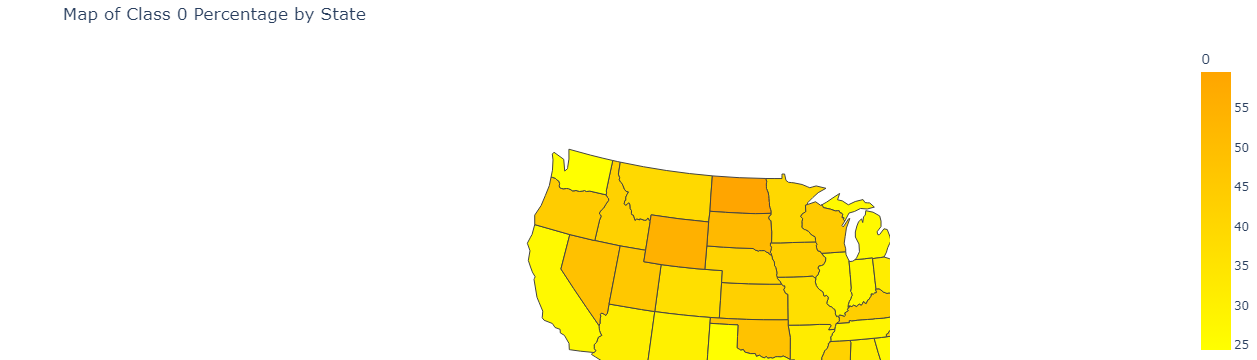

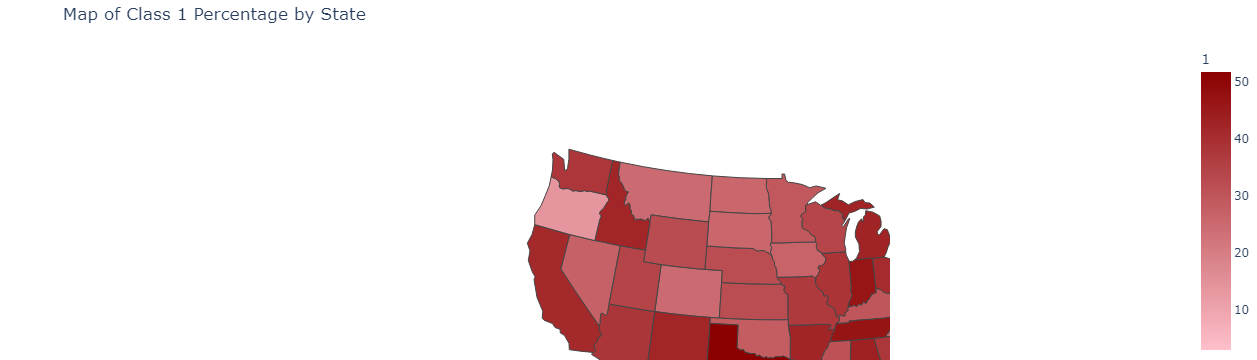

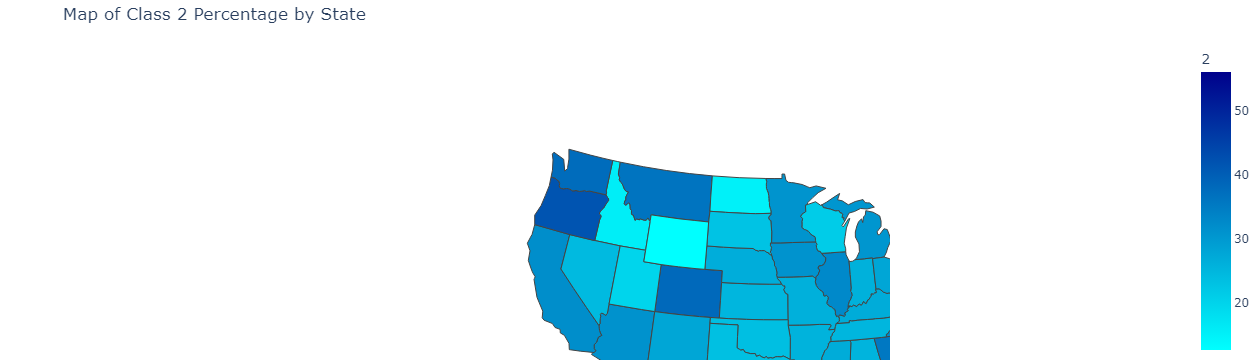

In [134]:
import plotly.express as px

color_scales = {
    '0': ['yellow', 'orange'],
    '1': ['pink', 'darkred'],
    '2': ['cyan', 'darkblue']
}
for cls in statewise_counts_percentage.columns[1:]:
    fig = px.choropleth(statewise_counts_percentage,
                        locationmode='USA-states',
                        locations='STATE',
                        color=cls,
                        hover_name='STATE',
                        scope='usa',
                        color_continuous_scale=color_scales[str(cls)],
                        labels={cls: f'Percentage of records for Class {cls}'},
                        title=f"Map of Class {cls} Percentage by State")
    fig.update_geos(fitbounds="locations", visible=False)
    fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
    fig.show()


# Export Results to CSV

In [84]:
# Write the DataFrame to a CSV file
results.to_csv('//hvs-nas1/Customdata/model_output/test_output.csv', index=False)